In [1]:
from fastai import *
from fastai.vision import *
import torch.onnx
from torch.autograd import Variable
import os
import cv2
from torch.optim import *
from fastai.callbacks import *

os.environ["TORCH_HOME"] = "/media/subhaditya/DATA/COSMO/Datasets-Useful"

In [2]:
path = Path("/media/subhaditya/DATA/COSMO/Datasets/emotionMask")

In [5]:
data = (
    (
        ImageList.from_folder(path)
        .split_by_rand_pct()
        .label_from_folder()
        .transform(get_transforms(max_warp=0.0), size=64)
    )
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

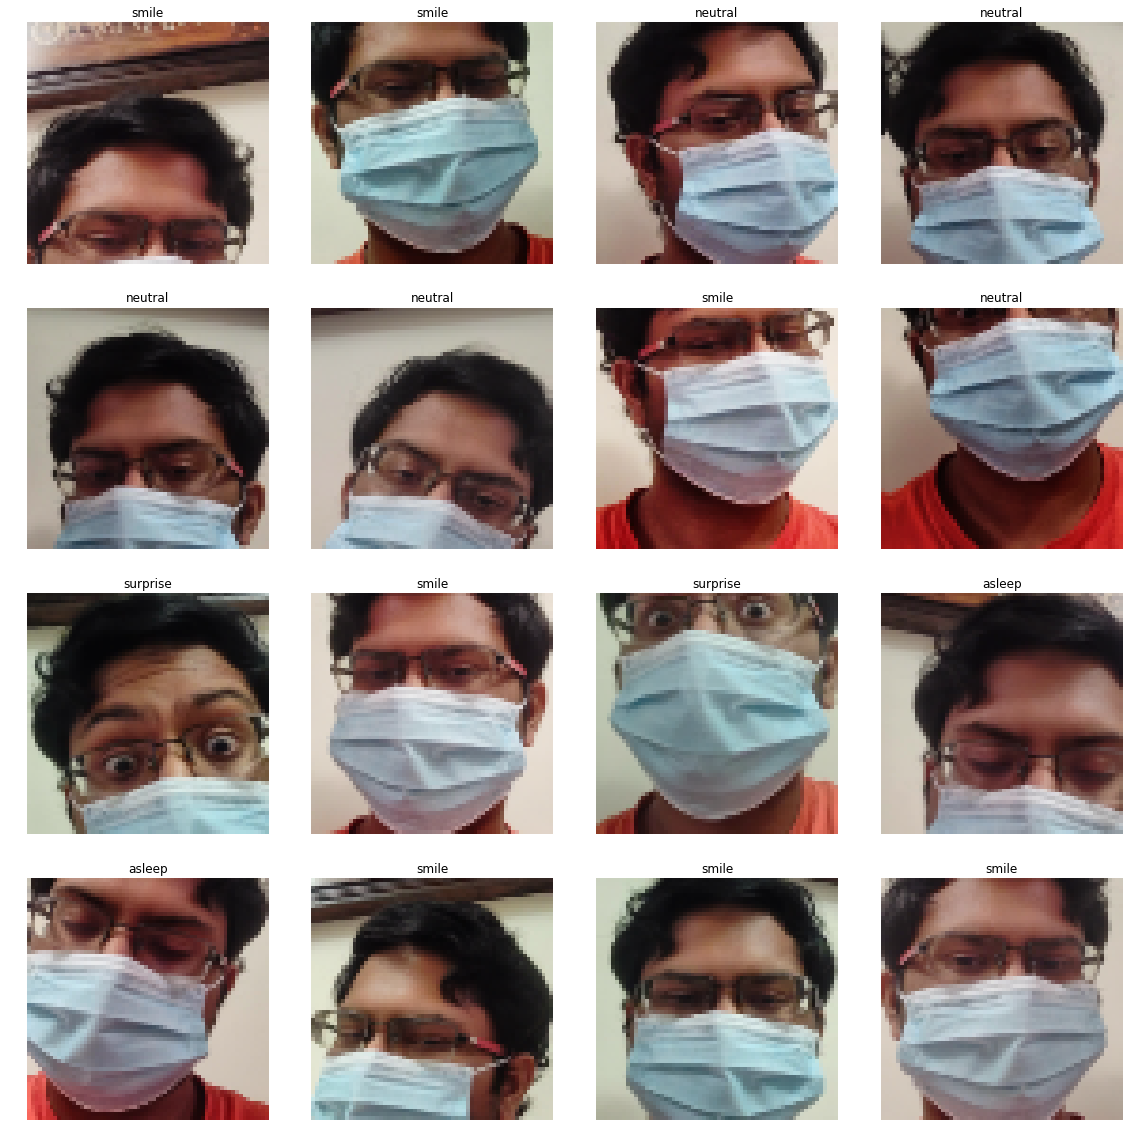

In [6]:
data.show_batch(4)

In [7]:
data.c

4

In [8]:
learn = None
gc.collect()

31864

In [9]:
learn = cnn_learner(
    data, models.resnet34, metrics=[accuracy], opt_func=AdamW, callback_fns=ShowGraph
).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


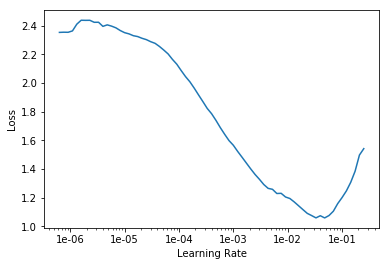

In [10]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.431412,5.944393,0.300000,00:08
1,0.903326,2.429694,0.690909,00:06
2,0.702912,4.766603,0.809091,00:06
3,0.622394,11.156654,0.572727,00:06
4,0.534225,2.887822,0.818182,00:06
5,0.468750,1.601033,0.827273,00:06
6,0.396026,2.763535,0.900000,00:06
7,0.346166,0.853702,0.872727,00:06
8,0.295564,0.133616,0.963636,00:07
9,0.257757,0.000023,1.000000,00:06


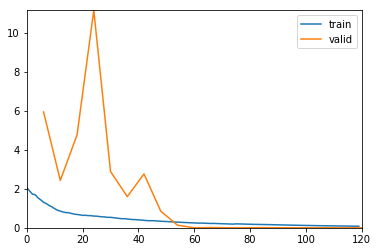

In [11]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3, 1e-2), wd=1e-3)

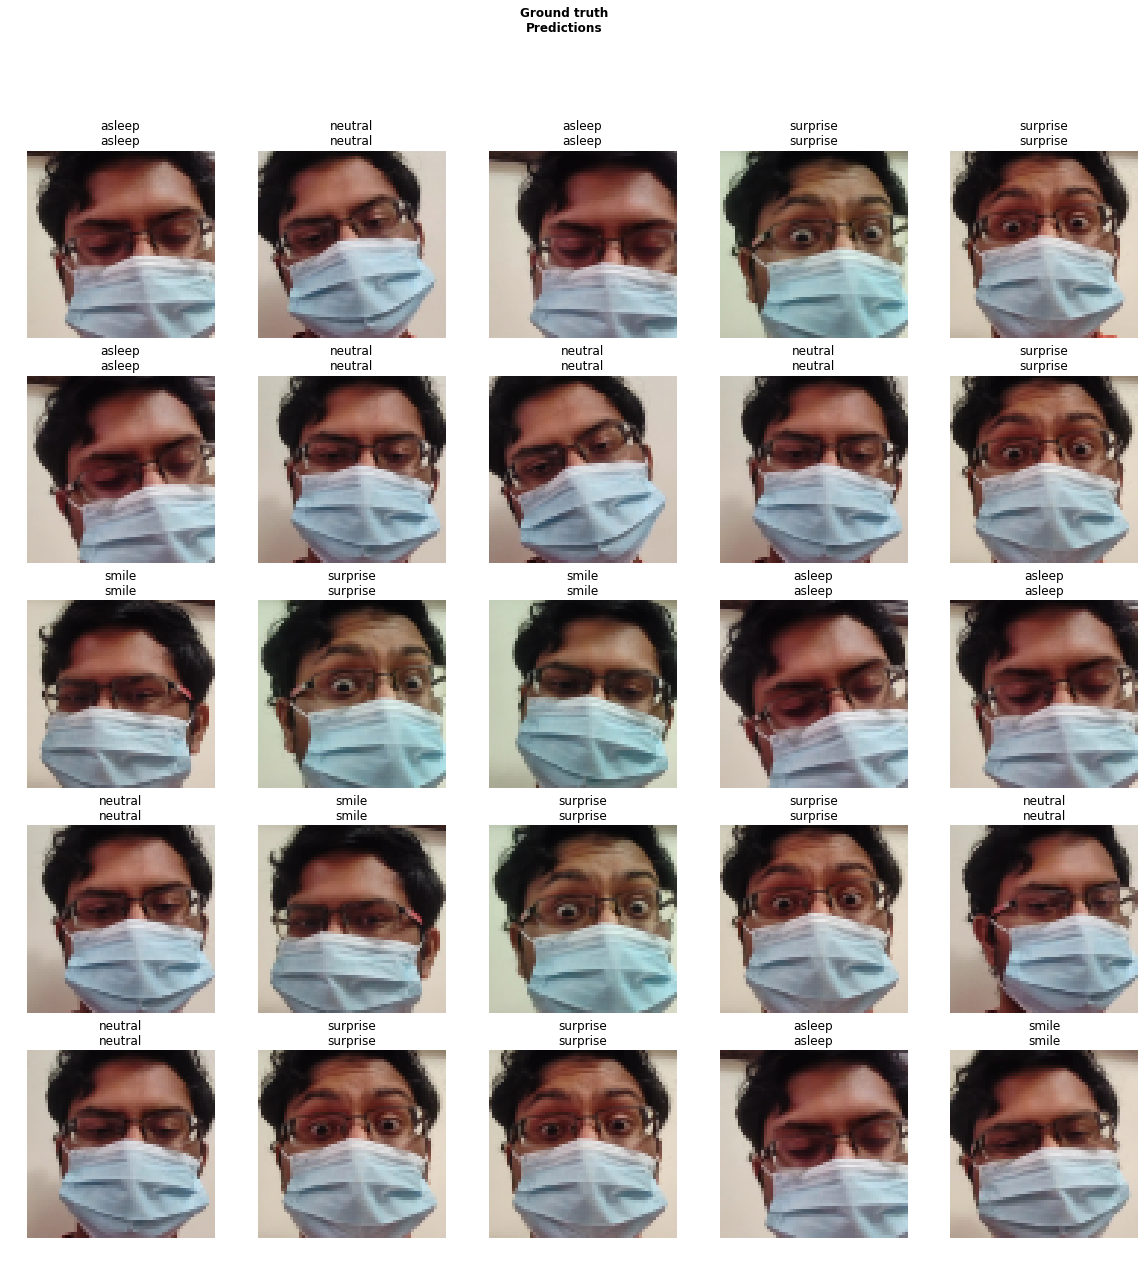

In [13]:
learn.show_results(ds_type=DatasetType.Valid)

In [17]:
learn.data.y.classes

['asleep', 'neutral', 'smile', 'surprise']

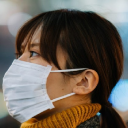

In [29]:
open_image(path / "test/img1.jpg").resize(128)

In [25]:
str(learn.predict(open_image(path / "test/img1.jpg"))[0])

'neutral'

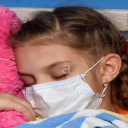

In [30]:
open_image(path / "test/img2.jpg").resize(128)

In [21]:
str(learn.predict(open_image(path / "test/img2.jpg"))[0])

'asleep'

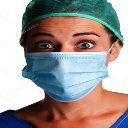

In [35]:
open_image(path / "test/img4.jpg").resize(128)

In [36]:
str(learn.predict(open_image(path / "test/img4.jpg"))[0])

'surprise'